In [1]:
#!/usr/bin/python
#coding=utf-8
#用於提取训练log，去除不可解析的log后使log文件格式化，生成新的log文件用以繪圖
import inspect
import os
import random
import sys
def extract_log(log_file, new_log_file, key_word):
    with open(log_file, 'r') as f:
        with open(new_log_file, 'w') as train_log:
            for line in f:
                #去除多GPU的同步log；去除除零错误的log
                if ('Syncing' in line) or ('nan' in line):
                    continue
                if key_word in line:
                    train_log.write(line)
    f.close()
    train_log.close()
    
extract_log('D:/test/train0805_yolov3_4000.log', 'D:/test/logtotxt/log_loss.txt', 'images')
extract_log('D:/test/train0805_yolov3_4000.log', 'D:/test/logtotxt/log_iou.txt', 'IOU')

In [2]:
#loss繪製
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#根據自己的log_loss.txt中的行数修改lines, 修改训练时的迭代起始次數(start_ite)和结束次數(end_ite)。
lines = 4004
start_ite =  1#log_loss.txt里面的最小迭代次数
end_ite = 4003 #log_loss.txt里面的最大迭代次数
step = 10 #跳行数，决定画图的稠密程度
igore = 0 #当开始的loss较大时，你需要忽略前igore次迭代，注意这里是迭代次数
 

y_ticks = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900]#纵坐标的值，可以自己设置。
data_path =  'D:/test/logtotxt/log_loss.txt' #log_loss的路径。
result_path = 'D:/test/train_loss' #保存结果的路径。
 
####-----------------只需要改上面的，下面的可以不改动
names = ['loss', 'avg', 'rate', 'seconds', 'images']
result = pd.read_csv(data_path, skiprows=[x for x in range(lines) if (x<lines*1.0/((end_ite - start_ite)*1.0)*igore or x%step!=9)], error_bad_lines=\
False, names=names)
result.head()
for name in names:
    result[name] = result[name].str.split(' ').str.get(1)

result.head()
result.tail()
 
for name in names:
    result[name] = pd.to_numeric(result[name])
result.dtypes
print(result['avg'].values)
 
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
 
###-----------设置横坐标的值。
x_num = len(result['avg'].values)
tmp = (end_ite-start_ite - igore)/(x_num*1.0)
x = []
for i in range(x_num):
	x.append(i*tmp + start_ite + igore)
#print(x)
print('total = %d\n' %x_num)
print('start = %d, end = %d\n' %(x[0], x[-1]))
###----------
 
ax.plot(x, result['avg'].values, label='avg_loss')
#ax.plot(result['loss'].values, label='loss')
plt.yticks(y_ticks)#如果不想自己设置纵坐标，可以注释掉。
plt.grid()
ax.legend(loc = 'best')
ax.set_title('The loss curves')
ax.set_xlabel('batches')
fig.savefig(result_path)


[1.88026343e+03 1.48572925e+03 1.22980188e+03 1.47136011e+03
 1.56549292e+03 1.01279651e+03 5.32109985e+02 3.53775757e+02
 2.66998199e+02 1.13369545e+02 4.69647060e+01 2.08733250e+01
 1.00762430e+01 6.05030100e+00 4.14793300e+00 3.37493900e+00
 2.90667700e+00 2.85440800e+00 2.99117600e+00 2.66430100e+00
 2.46480900e+00 2.13053600e+00 2.02685500e+00 1.92188100e+00
 2.27094300e+00 1.82927200e+00 1.52389400e+00 1.63699000e+00
 1.58600500e+00 1.42763900e+00 1.33379700e+00 1.27732300e+00
 1.47320200e+00 1.19918600e+00 1.07108000e+00 9.95064000e-01
 1.11037200e+00 9.97899000e-01 1.05122900e+00 9.88719000e-01
 8.40049000e-01 1.03166300e+00 9.81388000e-01 7.69950000e-01
 6.95211000e-01 6.00676000e-01 7.10326000e-01 6.38982000e-01
 7.11232000e-01 7.28602000e-01 9.52917000e-01 6.93925000e-01
 5.65830000e-01 5.73159000e-01 4.89476000e-01 4.53466000e-01
 7.27441000e-01 5.66926000e-01 5.82319000e-01 4.50604000e-01
 6.67708000e-01 4.71506000e-01 4.08774000e-01 3.34328000e-01
 6.09307000e-01 4.697060

In [8]:
#IOU繪製
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
#根据log_iou修改行数
lines = 151936
step = 250
start_ite = 1
end_ite = 3500
igore = 0
data_path =  'D:/test/log_iou.txt' #log_loss的路径。
result_path = 'D:/test/Region Avg IOU' #保存结果的路径。
 
names = ['Normalizer iou', 'cls','Region Avg IOU', 'GIOU', 'Class', 'Obj', 'No Obj', '.5R', '.75R', 'count', 'class_loss', 'iou_loss', 'total_loss']
#result = pd.read_csv('log_iou.txt', skiprows=[x for x in range(lines) if (x%10==0 or x%10==9)]\
result = pd.read_csv(data_path, skiprows=[x for x in range(lines) if (x<lines*1.0/((end_ite - start_ite)*1.0)*igore or x%step!=0)]\
, error_bad_lines=False, names=names)
result.head()
 
for name in names:
    result[name] = result[name].str.split(': ').str.get(1)
result.head()
result.tail()
for name in names:
    result[name] = pd.to_numeric(result[name])
result.dtypes
 
####--------------
x_num = len(result['Region Avg IOU'].values)
tmp = (end_ite-start_ite - igore)/(x_num*1.0)
x = []
for i in range(x_num):
	x.append(i*tmp + start_ite + igore)
#print(x)
print('total = %d\n' %x_num)
print('start = %d, end = %d\n' %(x[0], x[-1]))
####-------------
 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x, result['Region Avg IOU'].values, label='Region Avg IOU')
#ax.plot(result['Avg Recall'].values, label='Avg Recall')
plt.grid()
ax.legend(loc='best')
ax.set_title('The Region Avg IOU curves')
ax.set_xlabel('batches')
fig.savefig(result_path)


ValueError: Unable to parse string "(iou" at position 0

0       0.000000
1       0.395881
2       0.599728
3       0.000000
4       0.425542
5       0.488846
6       0.118431
7       0.358257
8       0.286646
9       0.000000
10      0.340198
11      0.250725
12      0.000000
13      0.332009
14      0.422739
15      0.000000
16      0.301484
17      0.000000
18      0.278720
19      0.183718
20      0.000000
21      0.493777
22      0.213448
23      0.000000
24      0.434514
25      0.335586
26      0.000000
27      0.000000
28      0.000000
29      0.000000
          ...   
2344    0.710833
2345    0.438669
2346    0.000000
2347    0.644153
2348    0.686093
2349    0.905633
2350    0.762764
2351    0.508047
2352    0.000000
2353    0.583923
2354    0.637323
2355    0.544911
2356    0.659900
2357    0.730824
2358    0.672610
2359    0.684079
2360    0.583942
2361    0.780474
2362    0.533861
2363    0.000000
2364    0.827710
2365    0.835476
2366    0.560651
2367    0.713677
2368    0.730911
2369    0.427815
2370    0.698489
2371    0.6568

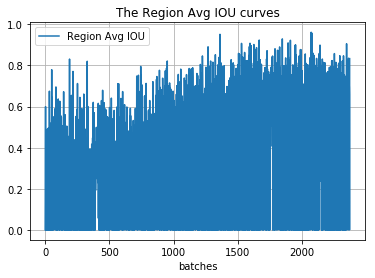

In [109]:
#v4繪製iou
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
 
#根据log_iou修改行数
lines = 151936 #log_iou檔案行數
step = 64 #lines/step=batch 
start_ite = 1 #最小迭代次数
end_ite = 3500 #最大迭代次数
igore = 0 #当开始的loss较大时，你需要忽略前igore次迭代，注意这里是迭代次数
data_path =  'D:/test/log_iou.txt' #log_loss的路径。
result_path = 'D:/test/Region Avg IOU' #保存结果的路径。

#根據項目取值
names = ['iou', 'cls','Region Avg IOU', 'GIOU', 'Class', 'Obj', 'No Obj', '.5R', '.75R', 'count', 'class_loss', 'iou_loss', 'total_loss']
#result = pd.read_csv(data_path, skiprows=[x for x in range(lines) if (x%10==0 or x%10==9) ] ,error_bad_lines=False, names = ['iou', 'cls','Region Avg IOU', 'GIOU', 'Class', 'Obj', 'No Obj', '.5R', '.75R', 'count', 'class_loss', 'iou_loss', 'total_loss'])
result = pd.read_csv(data_path, skiprows=[x for x in range(lines) if (x<lines*1.0/((end_ite - start_ite)*1.0)*igore or x%step!=0)]\
, error_bad_lines=False, names=names)
result.head()

result['iou']=result['iou'].str.split(': ').str.get(1)
result['cls']=result['cls'].str.split(': ').str.get(1)
result['cls']=result['Region Avg IOU'].str.split(')').str.get(0)
result['cls']=result['cls'].str.split(' ').str.get(2)
result['Region Avg IOU']=result['Region Avg IOU'].str.split(': ').str.get(2)
result['GIOU']=result['GIOU'].str.split(': ').str.get(1)
result['GIOU']=result['GIOU'].str.split(')').str.get(0)
result['Class']=result['Class'].str.split(': ').str.get(1)
result['Obj']=result['Obj'].str.split(': ').str.get(1)
result['No Obj']=result['No Obj'].str.split(': ').str.get(1)
result['.5R']=result['.5R'].str.split(': ').str.get(1)
result['.75R']=result['.75R'].str.split(': ').str.get(1)
result['count']=result['count'].str.split(': ').str.get(1)
result['class_loss']=result['class_loss'].str.split('= ').str.get(1)
result['iou_loss']=result['iou_loss'].str.split('= ').str.get(1)
result['total_loss']=result['total_loss'].str.split('= ').str.get(1)
result.head()
result.tail()
 
# print(result.head())
# print(result.tail())
# print(result.dtypes)

print(result['Region Avg IOU'])

#result['iou']=pd.to_numeric(result['iou'])
result['cls']=pd.to_numeric(result['cls'])
result['Region Avg IOU']=pd.to_numeric(result['Region Avg IOU'])
result['GIOU']=pd.to_numeric(result['GIOU'])
result['Class']=pd.to_numeric(result['Class'])
result['Obj']=pd.to_numeric(result['Obj'])
result['No Obj']=pd.to_numeric(result['No Obj'])
result['.5R']=pd.to_numeric(result['.5R'])
result['.75R']=pd.to_numeric(result['.75R'])
result['count']=pd.to_numeric(result['count'])
result['class_loss']=pd.to_numeric(result['class_loss'])
result['iou_loss']=pd.to_numeric(result['iou_loss'])
result['total_loss']=pd.to_numeric(result['total_loss'])
result.dtypes

"""
####--------------
x_num = len(result['Region Avg IOU'].values)
tmp = (end_ite-start_ite - igore)/(x_num*1.0)
x = []
for i in range(x_num):
	x.append(i*tmp + start_ite + igore)
#print(x)
print('total = %d\n' %x_num)
print('start = %d, end = %d\n' %(x[0], x[-1]))
####-------------
"""

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(result['Region Avg IOU'].values,label='Region Avg IOU')
# ax.plot(result['Class'].values,label='Class')
# ax.plot(result['Obj'].values,label='Obj')
# ax.plot(result['No Obj'].values,label='No Obj')
# ax.plot(result['Avg Recall'].values,label='Avg Recall')
# ax.plot(result['count'].values,label='count')
plt.grid()
ax.legend(loc='best')
# ax.set_title('The Region Avg IOU curves')
ax.set_title('The Region Avg IOU curves')
ax.set_xlabel('batches')
# fig.savefig('Avg IOU')
fig.savefig(result_path)